In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk(f'{os.getcwd()}/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/home/brian02oriel/Documents/PythonProjects/python-kaggle-competitions/Academic_success_classification/dataset/data.csv
/home/brian02oriel/Documents/PythonProjects/python-kaggle-competitions/Academic_success_classification/dataset/train.csv
/home/brian02oriel/Documents/PythonProjects/python-kaggle-competitions/Academic_success_classification/dataset/test.csv


In [2]:
train_df = pd.read_csv("./dataset/train.csv")
test_df = pd.read_csv("./dataset/test.csv")
train_df

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,76513,1,17,1,9254,1,1,121.0,1,19,...,0,6,8,5,10.600000,0,13.9,-0.3,0.79,Graduate
76514,76514,1,1,6,9254,1,1,125.0,1,1,...,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,Graduate
76515,76515,5,17,1,9085,1,1,138.0,1,37,...,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,Enrolled
76516,76516,1,1,3,9070,1,1,136.0,1,38,...,0,6,0,0,0.000000,0,7.6,2.6,0.32,Dropout


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [4]:
train_df.describe()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,76517.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


In [5]:
train_df.columns

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

In [6]:
numerical_columns = []
categorical_columns = []
for col in train_df.columns:
    if len(train_df[col].unique()) <= 10:
        categorical_columns.append(col)
    else:
        numerical_columns.append(col)
print(f"Numerical: {numerical_columns}")
print(f"Categorical: {categorical_columns}")

Numerical: ['id', 'Application mode', 'Course', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']
Categorical: ['Marital status', 'Application order', 'Daytime/evening attendance', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Internat

My Categorical: ['Marital status', 
                 'Application mode', 
                 'Application order', 
                 'Course', 
                 'Daytime/evening attendance', 
                 'Previous qualification', 
                 'Displaced', 
                 'Nacionality', 
                 "Mother's qualification", 
                 "Father's qualification", 
                 "Mother's occupation", 
                 "Father's occupation", 
                 'Educational special needs', 
                 'Debtor', 
                 'Tuition fees up to date', 
                 'Gender', 
                 'Scholarship holder', 
                 'International', 
                 'Target']

My Numerical: ['Previous qualification (grade)',
       'Admission grade',
       'Unemployment rate',
       'Inflation rate',
       'GDP',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)']

In [7]:
train_df['Target'].unique()

array(['Graduate', 'Dropout', 'Enrolled'], dtype=object)

In [8]:
def corr_matrix(cols, df):
    # Correlation matrix
    df_copy = df[cols].copy()
    df_copy['Target'] = df_copy['Target'].map({'Graduate': 0, 'Dropout': 1, 'Enrolled': 2})
    corr_matrix = df_copy.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix Heatmap')
    plt.show()
    

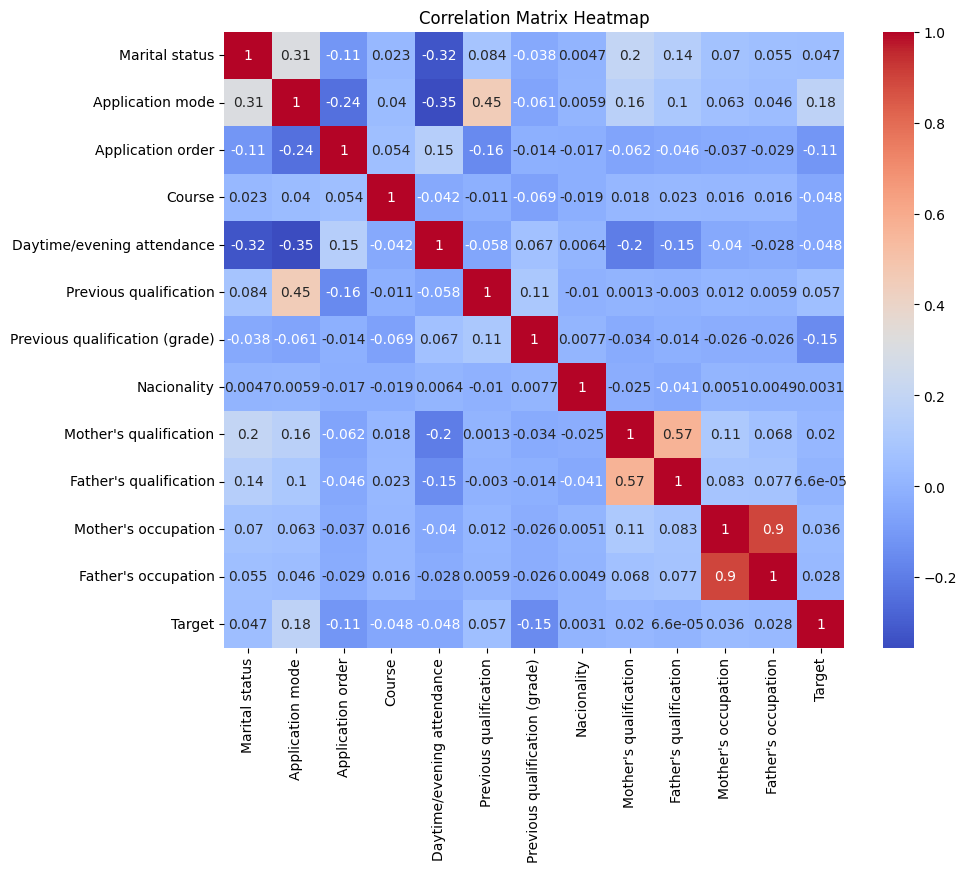

In [9]:
corr_matrix(['Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       "Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation", 'Target'], train_df)

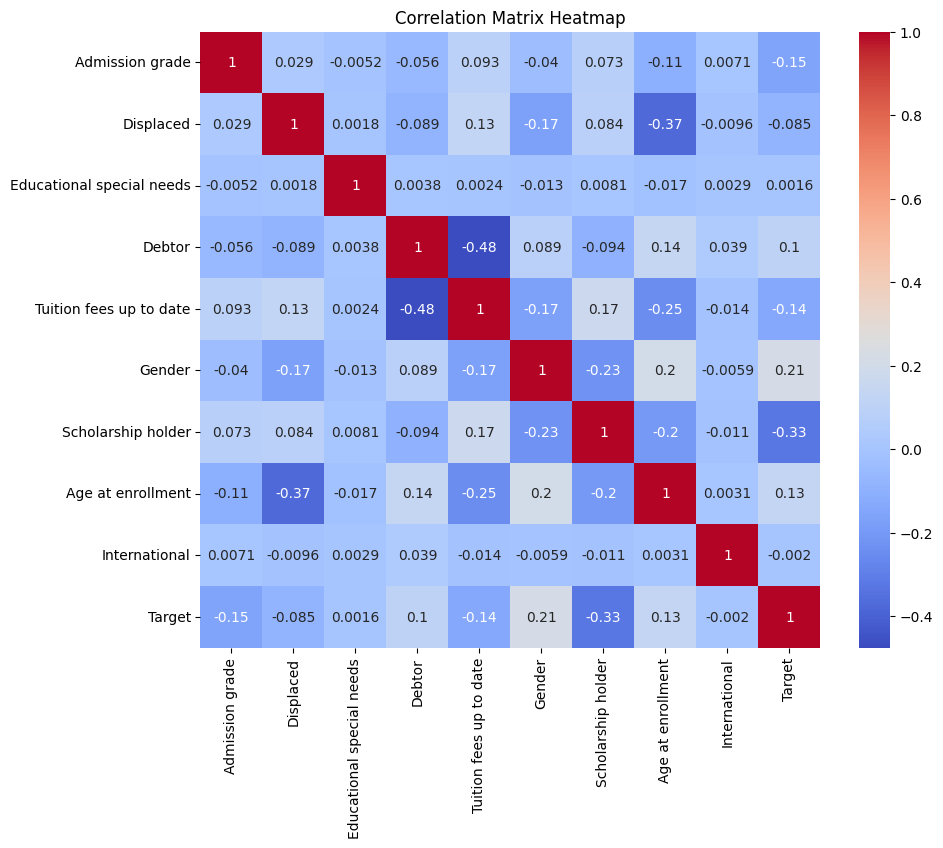

In [10]:
corr_matrix(['Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International', 'Target'], train_df)

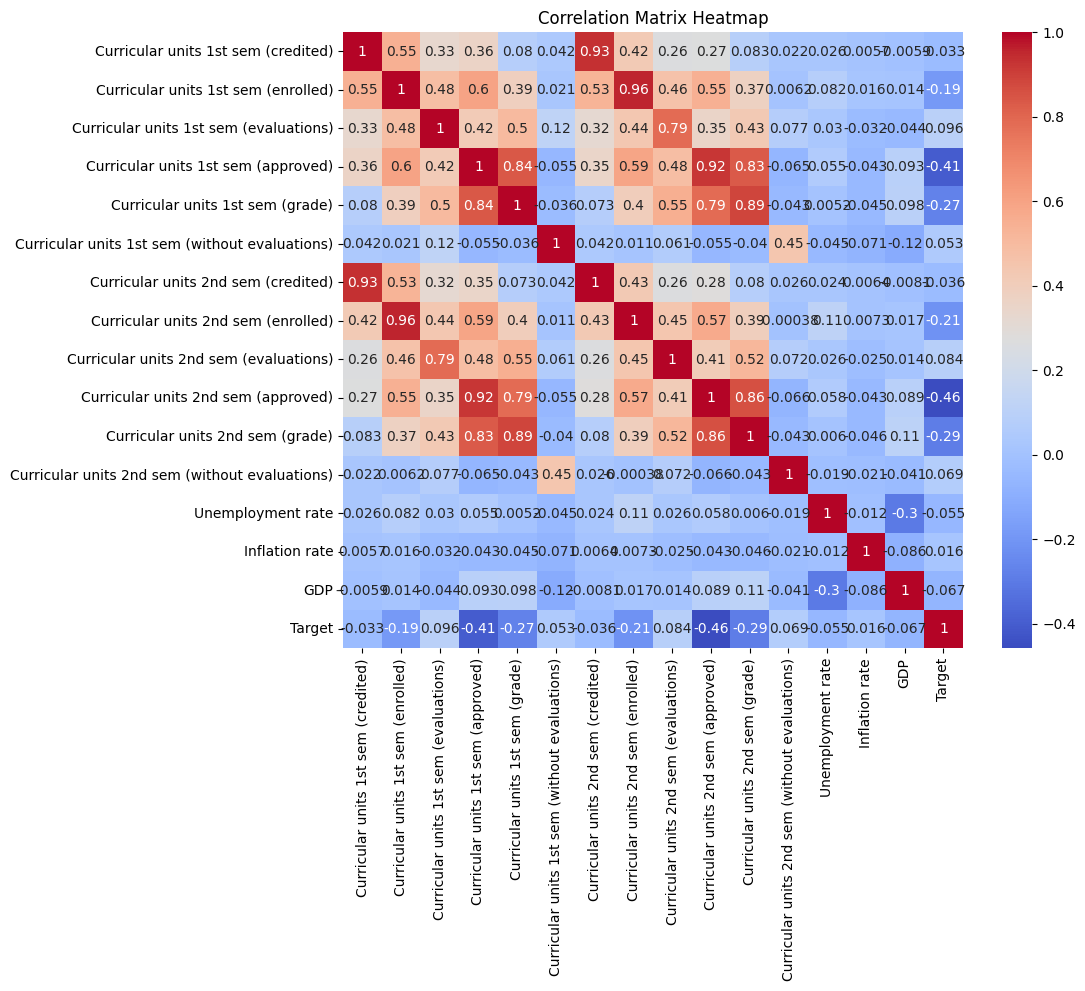

In [11]:
corr_matrix(['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Target'], train_df)

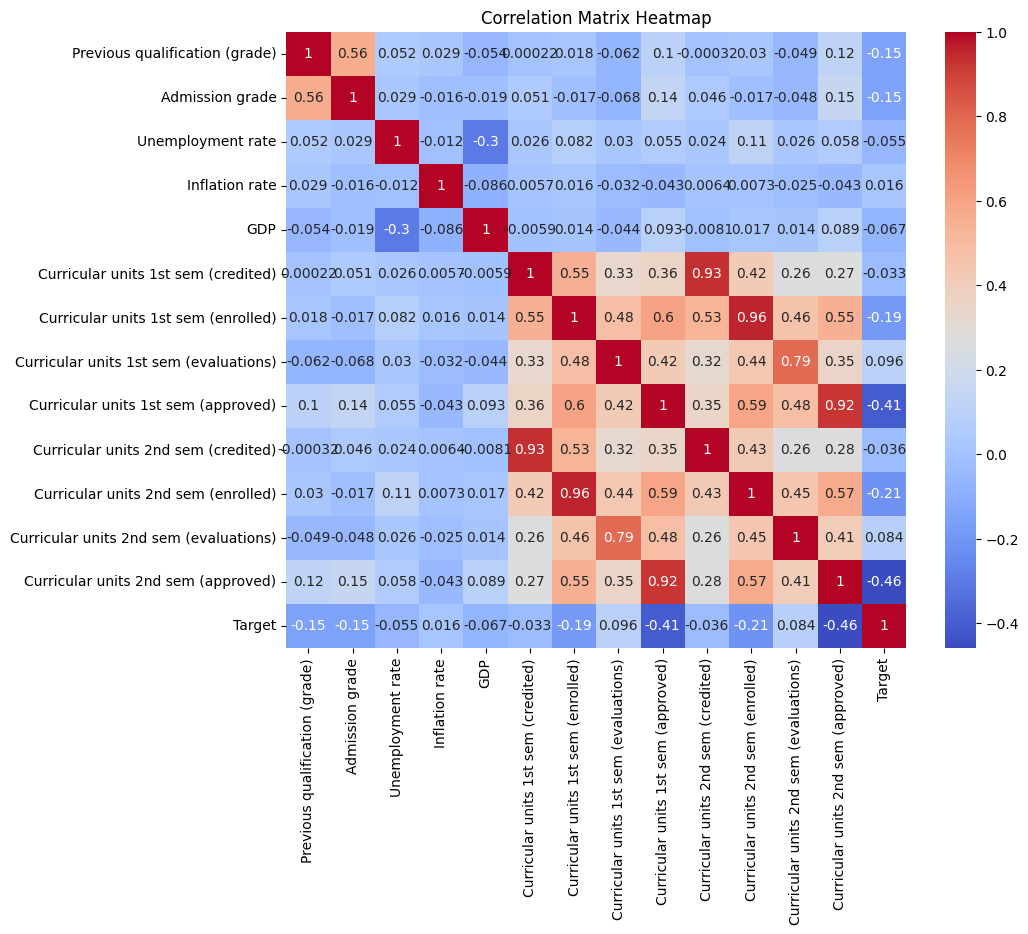

In [12]:
corr_matrix(['Previous qualification (grade)',
       'Admission grade',
       'Unemployment rate',
       'Inflation rate',
       'GDP',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Target'], train_df)

In [13]:
def plot_clusters(df, x, y):
    df_copy = df.copy()

    # Plot scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, hue='Target', data=df_copy)
    plt.title(f"{y} vs {x}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

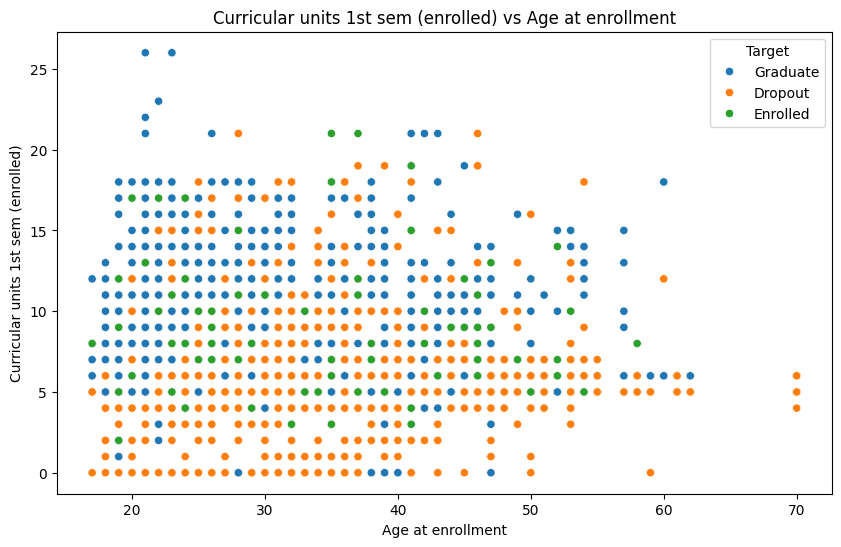

In [14]:
plot_clusters(train_df, "Age at enrollment", "Curricular units 1st sem (enrolled)")

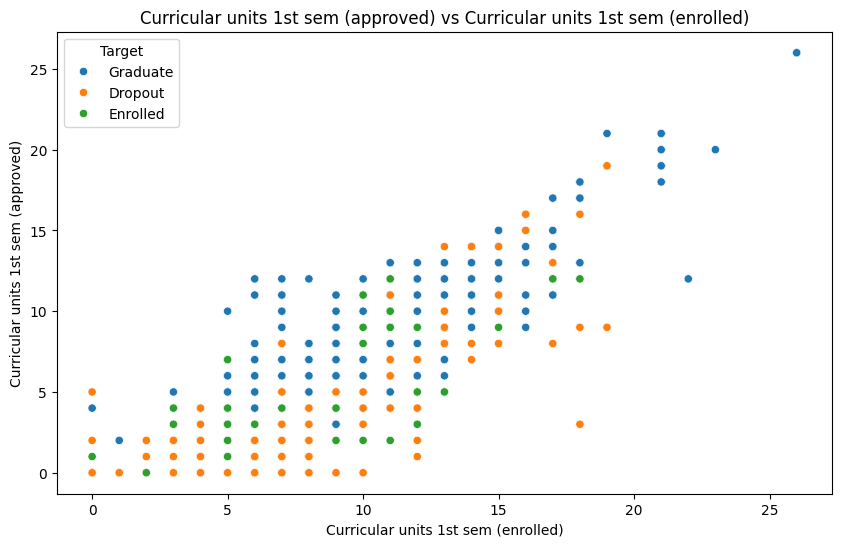

In [15]:
plot_clusters(train_df, "Curricular units 1st sem (enrolled)", "Curricular units 1st sem (approved)")

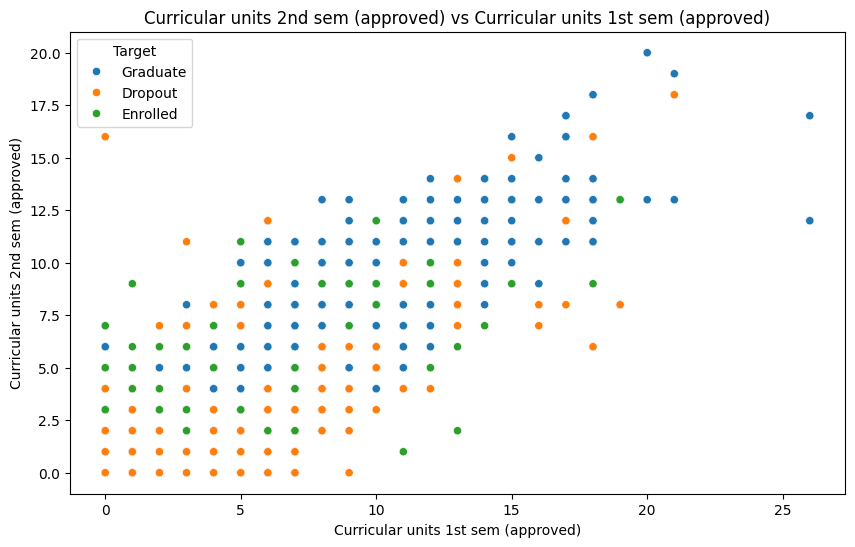

In [16]:
plot_clusters(train_df, "Curricular units 1st sem (approved)", "Curricular units 2nd sem (approved)")

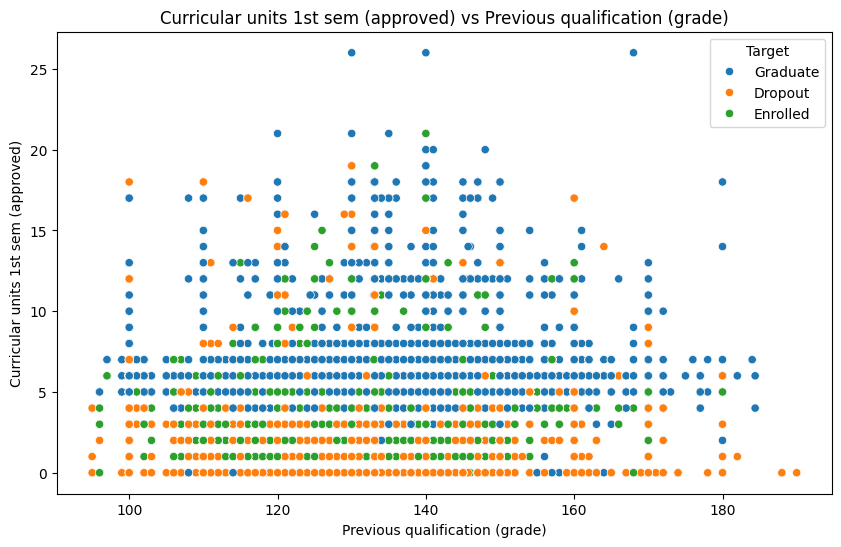

In [17]:
plot_clusters(train_df, "Previous qualification (grade)", "Curricular units 1st sem (approved)")

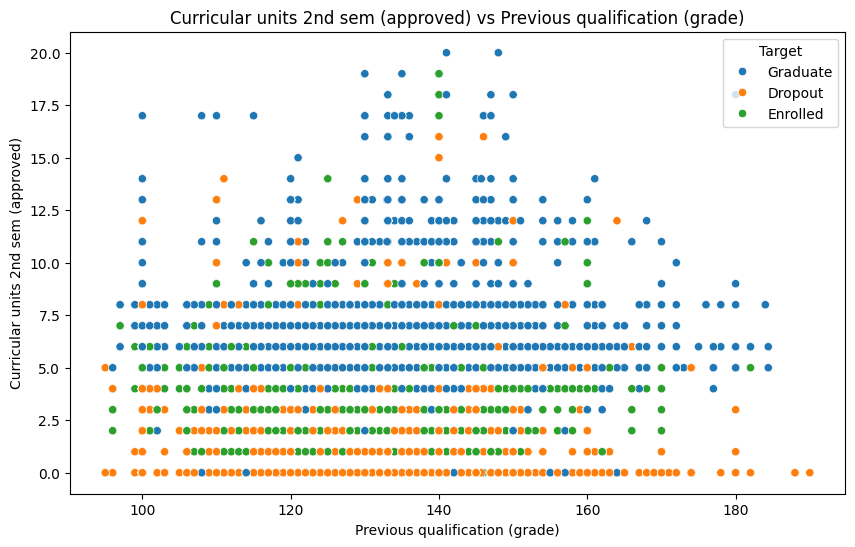

In [18]:
plot_clusters(train_df, "Previous qualification (grade)", "Curricular units 2nd sem (approved)")

In [19]:
def pairplot(df):
       # Pair plot
       df.loc['Target'] = df['Target'].map({0: 'Graduate', 1: 'Dropout', 2: 'Enrolled'})
       sns.pairplot(df, hue='Target', markers=["o", "s", "D"])
       plt.suptitle('Pairplot of Academic Success Dataset', y=1.02)
       plt.show()


/tmp/ipykernel_434127/3506140169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc['Target'] = df['Target'].map({0: 'Graduate', 1: 'Dropout', 2: 'Enrolled'})


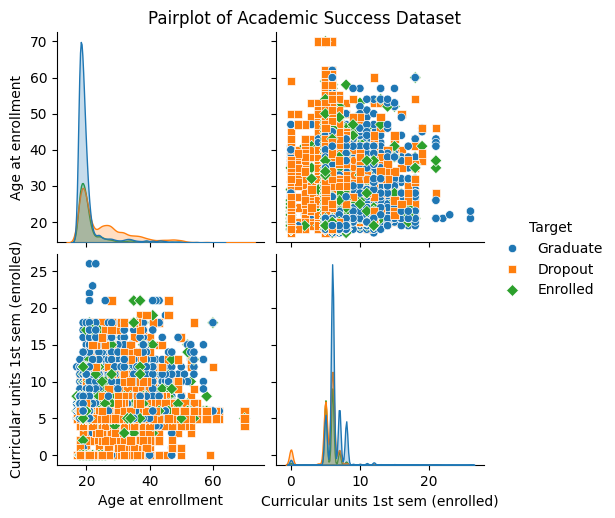

In [20]:
pairplot(train_df[["Age at enrollment", "Curricular units 1st sem (enrolled)", 'Target']])

/tmp/ipykernel_434127/3506140169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc['Target'] = df['Target'].map({0: 'Graduate', 1: 'Dropout', 2: 'Enrolled'})


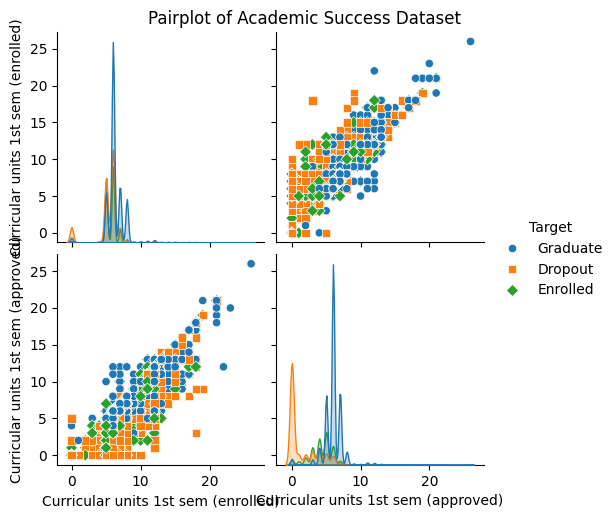

In [21]:
pairplot(train_df[["Curricular units 1st sem (enrolled)", "Curricular units 1st sem (approved)", 'Target']])

/tmp/ipykernel_434127/3506140169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc['Target'] = df['Target'].map({0: 'Graduate', 1: 'Dropout', 2: 'Enrolled'})


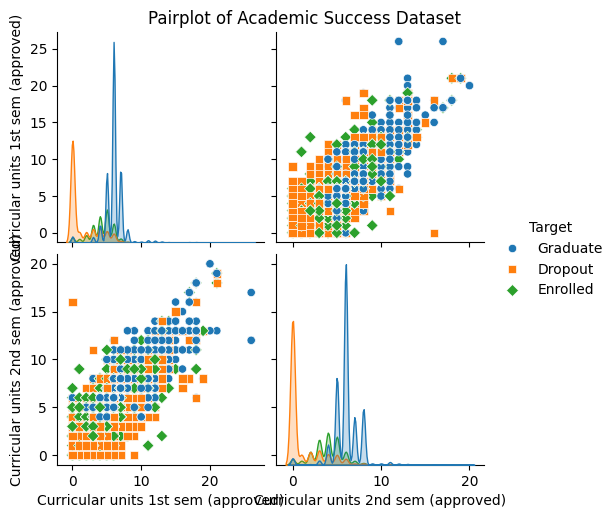

In [22]:
pairplot(train_df[["Curricular units 1st sem (approved)", "Curricular units 2nd sem (approved)", 'Target']])

/tmp/ipykernel_434127/3506140169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc['Target'] = df['Target'].map({0: 'Graduate', 1: 'Dropout', 2: 'Enrolled'})


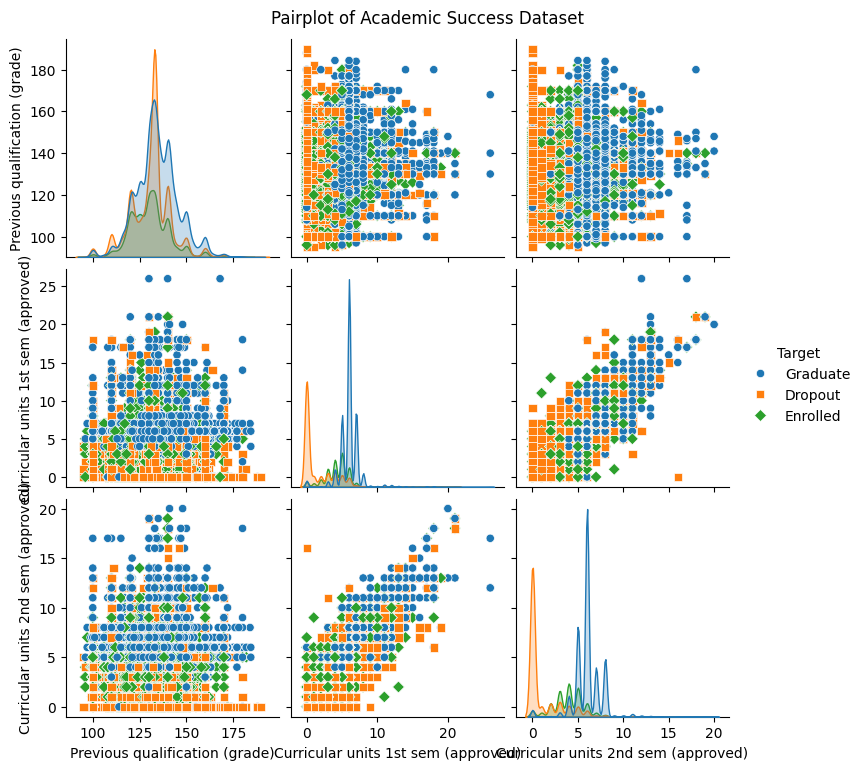

In [23]:
pairplot(train_df[["Previous qualification (grade)", "Curricular units 1st sem (approved)", "Curricular units 2nd sem (approved)", 'Target']])

In [24]:
def pie_chart(df, label):
    # Labels and counts
    counts = df.value_counts()

    # Plotting the pie chart
    plt.figure(figsize=(5, 5))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['#3487ff', '#73acff', '#a1c7ff'])
    plt.title(label)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

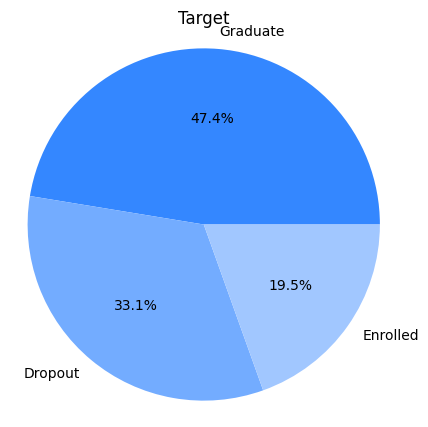

In [25]:
pie_chart(train_df['Target'], 'Target')

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import scipy

def preprocessing(df, is_train=True):

    numerical_features = ['Previous qualification (grade)',
       'Admission grade',
       'Unemployment rate',
       'Inflation rate',
       'GDP',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)']
    categorical_features = ['Marital status', 
                 'Application mode', 
                 'Application order', 
                 'Course', 
                 'Daytime/evening attendance', 
                 'Previous qualification', 
                 'Displaced', 
                 'Nacionality', 
                 "Mother's qualification", 
                 "Father's qualification", 
                 "Mother's occupation", 
                 "Father's occupation", 
                 'Educational special needs', 
                 'Debtor', 
                 'Tuition fees up to date', 
                 'Gender', 
                 'Scholarship holder', 
                 'International']
    
    numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

    categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ])
    
    pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
    df_transformed = pipeline.fit_transform(df)
    
    columns_transformed = numerical_features + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))
    print(numerical_features)
    print(list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)))

    # Convert the sparse matrix to a dense array if necessary
    if isinstance(df_transformed, scipy.sparse.csr_matrix):
        df_transformed = df_transformed.toarray()
        print(type(df_transformed))  # Should be <class 'numpy.ndarray'>

    df_transformed = pd.DataFrame(df_transformed, columns=columns_transformed)
    
    df_transformed = pd.concat([pd.DataFrame(df[['id']], columns=['id']), df_transformed], axis=1) 
    
    if(is_train):
        df_transformed['Target'] = df['Target'].map({'Graduate': 0, 'Dropout': 1, 'Enrolled': 2})
        
        
    return df_transformed, pipeline.fit(df)

In [27]:
processed_df, pipeline = preprocessing(train_df)
processed_df

['Previous qualification (grade)', 'Admission grade', 'Unemployment rate', 'Inflation rate', 'GDP', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)']
['Marital status_1', 'Marital status_2', 'Marital status_3', 'Marital status_4', 'Marital status_5', 'Marital status_6', 'Application mode_1', 'Application mode_2', 'Application mode_3', 'Application mode_4', 'Application mode_5', 'Application mode_7', 'Application mode_9', 'Application mode_10', 'Application mode_12', 'Application mode_15', 'Application mode_16', 'Application mode_17', 'Application mode_18', 'Application mode_26', 'Application mode_27', 'Application mode_35', 'Application mode_39', 'Application mode_42', 'Application mode_43', 'Application mode_44', 'Applica

,id,Previous qualification (grade),Admission grade,Unemployment rate,Inflation rate,GDP,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),...,Debtor_1,Tuition fees up to date_0,Tuition fees up to date_1,Gender_0,Gender_1,Scholarship holder_0,Scholarship holder_1,International_0,International_1,Target
0,0,-0.580138,-0.220022,-0.158418,-0.449110,0.933176,-0.160702,0.064892,-0.385478,0.677640,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0
1,1,-0.671086,-0.442912,-0.158418,-0.449110,0.933176,-0.160702,0.064892,0.184603,-0.066414,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1
2,2,0.420293,1.539217,1.763675,-0.663578,-0.372698,-0.160702,0.064892,-2.095724,-1.554522,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1
3,3,-0.125396,0.058591,-0.158418,-0.449110,0.933176,-0.160702,0.663062,0.469644,1.049667,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,2
4,4,-0.034448,-0.419031,-1.477502,0.980680,0.178079,-0.160702,0.663062,1.324767,0.677640,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,76513,-1.034880,-0.705604,0.896848,-1.092515,0.386841,-0.160702,0.064892,0.469644,0.677640,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0
76514,76514,-0.671086,0.496410,-0.799116,-1.449963,-1.349882,-0.160702,0.064892,4.175176,-0.066414,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0
76515,76515,0.511242,-0.164300,-0.799116,-1.449963,-1.349882,-0.160702,-0.533278,1.609808,-0.066414,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2
76516,76516,0.329345,-0.044894,-1.477502,0.980680,0.178079,-0.160702,0.064892,-2.095724,-1.554522,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1


In [28]:
processed_df.columns

Index(['id', 'Previous qualification (grade)', 'Admission grade',
       'Unemployment rate', 'Inflation rate', 'GDP',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       ...
       'Debtor_1', 'Tuition fees up to date_0', 'Tuition fees up to date_1',
       'Gender_0', 'Gender_1', 'Scholarship holder_0', 'Scholarship holder_1',
       'International_0', 'International_1', 'Target'],
      dtype='object', length=295)

In [29]:
from sklearn.model_selection import train_test_split
X_columns = ['Previous qualification (grade)', 
             'Admission grade',
              'Unemployment rate',
              'Inflation rate',
              'GDP',
              'Curricular units 1st sem (credited)',
              'Curricular units 1st sem (enrolled)',
              'Curricular units 1st sem (evaluations)',
              'Curricular units 1st sem (approved)',
              'Curricular units 2nd sem (credited)',
              'Curricular units 2nd sem (enrolled)',
              'Curricular units 2nd sem (evaluations)',
              'Curricular units 2nd sem (approved)',
              'Marital status_1',
               'Marital status_2',
               'Marital status_3',
               'Marital status_4',
               'Marital status_5',
               'Marital status_6',
               'Application mode_1',
               'Application mode_2',
               'Application mode_3',
               'Application mode_4',
               'Application mode_5',
               'Application mode_7',
               'Application mode_9',
               'Application mode_10',
               'Application mode_12',
               'Application mode_15',
               'Application mode_16',
               'Application mode_17',
               'Application mode_18',
               'Application mode_26',
               'Application mode_27',
               'Application mode_35',
               'Application mode_39',
               'Application mode_42',
               'Application mode_43',
               'Application mode_44',
               'Application mode_51',
               'Application mode_53',
               'Application order_0',
               'Application order_1',
               'Application order_2',
               'Application order_3',
               'Application order_4',
               'Application order_5',
               'Application order_6',
               'Application order_9',
               'Course_33',
               'Course_39',
               'Course_171',
               'Course_979',
               'Course_8014',
               'Course_9003',
               'Course_9070',
               'Course_9085',
               'Course_9119',
               'Course_9130',
               'Course_9147',
               'Course_9238',
               'Course_9254',
               'Course_9500',
               'Course_9556',
               'Course_9670',
               'Course_9773',
               'Course_9853',
               'Course_9991',
               'Daytime/evening attendance_0',
               'Daytime/evening attendance_1',
               'Previous qualification_1',
               'Previous qualification_2',
               'Previous qualification_3',
               'Previous qualification_4',
               'Previous qualification_5',
               'Previous qualification_6',
               'Previous qualification_9',
               'Previous qualification_10',
               'Previous qualification_11',
               'Previous qualification_12',
               'Previous qualification_14',
               'Previous qualification_15',
               'Previous qualification_17',
               'Previous qualification_19',
               'Previous qualification_36',
               'Previous qualification_37',
               'Previous qualification_38',
               'Previous qualification_39',
               'Previous qualification_40',
               'Previous qualification_42',
               'Previous qualification_43',
               'Displaced_0',
               'Displaced_1',
               'Nacionality_1',
               'Nacionality_2',
               'Nacionality_6',
               'Nacionality_11',
               'Nacionality_17',
               'Nacionality_21',
               'Nacionality_22',
               'Nacionality_24',
               'Nacionality_25',
               'Nacionality_26',
               'Nacionality_32',
               'Nacionality_41',
               'Nacionality_62',
               'Nacionality_100',
               'Nacionality_101',
               'Nacionality_103',
               'Nacionality_105',
               'Nacionality_109',
               "Mother's qualification_1",
               "Mother's qualification_2",
               "Mother's qualification_3",
               "Mother's qualification_4",
               "Mother's qualification_5",
               "Mother's qualification_6",
               "Mother's qualification_7",
               "Mother's qualification_8",
               "Mother's qualification_9",
               "Mother's qualification_10",
               "Mother's qualification_11",
               "Mother's qualification_12",
               "Mother's qualification_14",
               "Mother's qualification_15",
               "Mother's qualification_18",
               "Mother's qualification_19",
               "Mother's qualification_22",
               "Mother's qualification_26",
               "Mother's qualification_27",
               "Mother's qualification_28",
               "Mother's qualification_29",
               "Mother's qualification_30",
               "Mother's qualification_31",
               "Mother's qualification_33",
               "Mother's qualification_34",
               "Mother's qualification_35",
               "Mother's qualification_36",
               "Mother's qualification_37",
               "Mother's qualification_38",
               "Mother's qualification_39",
               "Mother's qualification_40",
               "Mother's qualification_41",
               "Mother's qualification_42",
               "Mother's qualification_43",
               "Mother's qualification_44",
               "Father's qualification_1",
               "Father's qualification_2",
               "Father's qualification_3",
               "Father's qualification_4",
               "Father's qualification_5",
               "Father's qualification_6",
               "Father's qualification_7",
               "Father's qualification_9",
               "Father's qualification_10",
               "Father's qualification_11",
               "Father's qualification_12",
               "Father's qualification_13",
               "Father's qualification_14",
               "Father's qualification_15",
               "Father's qualification_18",
               "Father's qualification_19",
               "Father's qualification_20",
               "Father's qualification_21",
               "Father's qualification_22",
               "Father's qualification_23",
               "Father's qualification_24",
               "Father's qualification_25",
               "Father's qualification_26",
               "Father's qualification_27",
               "Father's qualification_29",
               "Father's qualification_30",
               "Father's qualification_31",
               "Father's qualification_33",
               "Father's qualification_34",
               "Father's qualification_35",
               "Father's qualification_36",
               "Father's qualification_37",
               "Father's qualification_38",
               "Father's qualification_39",
               "Father's qualification_40",
               "Father's qualification_41",
               "Father's qualification_42",
               "Father's qualification_43",
               "Father's qualification_44",
               "Mother's occupation_0",
               "Mother's occupation_1",
               "Mother's occupation_2",
               "Mother's occupation_3",
               "Mother's occupation_4",
               "Mother's occupation_5",
               "Mother's occupation_6",
               "Mother's occupation_7",
               "Mother's occupation_8",
               "Mother's occupation_9",
               "Mother's occupation_10",
               "Mother's occupation_11",
               "Mother's occupation_38",
               "Mother's occupation_90",
               "Mother's occupation_99",
               "Mother's occupation_101",
               "Mother's occupation_103",
               "Mother's occupation_122",
               "Mother's occupation_123",
               "Mother's occupation_124",
               "Mother's occupation_125",
               "Mother's occupation_127",
               "Mother's occupation_131",
               "Mother's occupation_132",
               "Mother's occupation_134",
               "Mother's occupation_141",
               "Mother's occupation_143",
               "Mother's occupation_144",
               "Mother's occupation_151",
               "Mother's occupation_152",
               "Mother's occupation_153",
               "Mother's occupation_163",
               "Mother's occupation_171",
               "Mother's occupation_172",
               "Mother's occupation_173",
               "Mother's occupation_175",
               "Mother's occupation_191",
               "Mother's occupation_192",
               "Mother's occupation_193",
               "Mother's occupation_194",
               "Father's occupation_0",
               "Father's occupation_1",
               "Father's occupation_2",
               "Father's occupation_3",
               "Father's occupation_4",
               "Father's occupation_5",
               "Father's occupation_6",
               "Father's occupation_7",
               "Father's occupation_8",
               "Father's occupation_9",
               "Father's occupation_10",
               "Father's occupation_11",
               "Father's occupation_12",
               "Father's occupation_13",
               "Father's occupation_19",
               "Father's occupation_22",
               "Father's occupation_39",
               "Father's occupation_90",
               "Father's occupation_96",
               "Father's occupation_99",
               "Father's occupation_101",
               "Father's occupation_102",
               "Father's occupation_103",
               "Father's occupation_112",
               "Father's occupation_114",
               "Father's occupation_121",
               "Father's occupation_122",
               "Father's occupation_123",
               "Father's occupation_124",
               "Father's occupation_125",
               "Father's occupation_131",
               "Father's occupation_132",
               "Father's occupation_134",
               "Father's occupation_135",
               "Father's occupation_141",
               "Father's occupation_143",
               "Father's occupation_144",
               "Father's occupation_148",
               "Father's occupation_151",
               "Father's occupation_152",
               "Father's occupation_153",
               "Father's occupation_154",
               "Father's occupation_161",
               "Father's occupation_163",
               "Father's occupation_171",
               "Father's occupation_172",
               "Father's occupation_174",
               "Father's occupation_175",
               "Father's occupation_181",
               "Father's occupation_182",
               "Father's occupation_183",
               "Father's occupation_191",
               "Father's occupation_192",
               "Father's occupation_193",
               "Father's occupation_194",
               "Father's occupation_195",
               'Educational special needs_0',
               'Educational special needs_1',
               'Debtor_0',
               'Debtor_1',
               'Tuition fees up to date_0',
               'Tuition fees up to date_1',
               'Gender_0',
               'Gender_1',
               'Scholarship holder_0',
               'Scholarship holder_1',
               'International_0',
               'International_1']
y_columns = ['Target']
X = processed_df[X_columns]
y = processed_df[y_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.model_selection import GridSearchCV

def findBestParams(model, params, X, y):
    grid_search = GridSearchCV(model, params, cv=5, scoring='r2', verbose=10)

    # Fit the GridSearchCV object to the data
    grid_search.fit(X, y.values.ravel())

    # Get the best parameters and best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Display the results
    print("Best Hyperparameters:", best_params)
    return best_model

In [31]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

knn_model = findBestParams(KNeighborsClassifier(), param_grid, X_train, y_train)
knn_model.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5; 1/32] START algorithm=auto, n_neighbors=3, weights=uniform.............
[CV 1/5; 1/32] END algorithm=auto, n_neighbors=3, weights=uniform;, score=-0.040 total time=   4.1s
[CV 2/5; 1/32] START algorithm=auto, n_neighbors=3, weights=uniform.............
[CV 2/5; 1/32] END algorithm=auto, n_neighbors=3, weights=uniform;, score=-0.024 total time=   3.8s
[CV 3/5; 1/32] START algorithm=auto, n_neighbors=3, weights=uniform.............
[CV 3/5; 1/32] END algorithm=auto, n_neighbors=3, weights=uniform;, score=-0.019 total time=   3.7s
[CV 4/5; 1/32] START algorithm=auto, n_neighbors=3, weights=uniform.............
[CV 4/5; 1/32] END algorithm=auto, n_neighbors=3, weights=uniform;, score=-0.030 total time=   3.8s
[CV 5/5; 1/32] START algorithm=auto, n_neighbors=3, weights=uniform.............
[CV 5/5; 1/32] END algorithm=auto, n_neighbors=3, weights=uniform;, score=-0.054 total time=   3.8s
[CV 1/5; 2/32] START algorithm=au

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],        # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'], # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30],        # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]              # Method of selecting samples for training each tree
}

rf_model = findBestParams(RandomForestClassifier(), param_grid, X_train, y_train)
rf_model.fit(X_train, y_train.values.ravel())